<a href="https://colab.research.google.com/github/GlazyevaValentina/PDS2_Glazyeva/blob/master/Lesson66/dz66.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Робота з відеоформатом

## Завдання

Використовуючи тренувальний датасет з архіву **data.zip** та **матеріали з додаткових джерел**, побудуйте систему детекції медичних масок на обличчі.

## Розв'язок

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
import zipfile
with zipfile.ZipFile('/content/gdrive/MyDrive/data.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [18]:
import tensorflow as tf

# підготовка даних
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

Found 1376 images belonging to 2 classes.


In [19]:
# побудова моделі
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [20]:
# тренування моделі
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples/train_generator.batch_size,
    epochs=10,
    verbose=1)

Epoch 1/10
43/43 [==============================] - 183s 4s/step - loss: 0.8008 - accuracy: 0.6374
Epoch 2/10
43/43 [==============================] - 174s 4s/step - loss: 0.2437 - accuracy: 0.9142
Epoch 3/10
43/43 [==============================] - 174s 4s/step - loss: 0.1816 - accuracy: 0.9426
Epoch 4/10
43/43 [==============================] - 183s 4s/step - loss: 0.1227 - accuracy: 0.9571
Epoch 5/10
43/43 [==============================] - 175s 4s/step - loss: 0.0906 - accuracy: 0.9738
Epoch 6/10
43/43 [==============================] - 193s 4s/step - loss: 0.0643 - accuracy: 0.9789
Epoch 7/10
43/43 [==============================] - 181s 4s/step - loss: 0.1367 - accuracy: 0.9528
Epoch 8/10
43/43 [==============================] - 175s 4s/step - loss: 0.0459 - accuracy: 0.9862
Epoch 9/10
43/43 [==============================] - 174s 4s/step - loss: 0.0366 - accuracy: 0.9876
Epoch 10/10
43/43 [==============================] - 180s 4s/step - loss: 0.0658 - accuracy: 0.9811


In [21]:
import cv2
import matplotlib.pyplot as plt

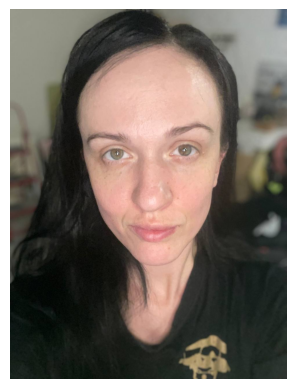

In [22]:
img = cv2.imread('/content/gdrive/MyDrive/me_without_mask.jpeg')
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.axis('off')
plt.show;

In [23]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/gdrive/MyDrive/me_without_mask.jpeg'
img = image.load_img(img_path,target_size=(224, 224))
images = image.img_to_array(img)
images = np.expand_dims(images,axis=0)
prediction = model.predict(images)
if prediction == 0:
  print('Wit mask')
else:
  print('Without mask')


1/1 [==============================] - 0s 317ms/step
Without mask


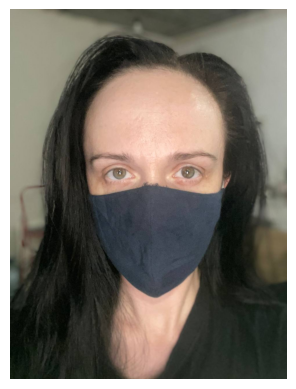

In [24]:
img = cv2.imread('/content/gdrive/MyDrive/me_with_mask.jpeg')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.axis('off')
plt.show;

In [26]:
img_path = '/content/gdrive/MyDrive/me_with_mask.jpeg'
img = image.load_img(img_path,target_size=(224, 224))
images = image.img_to_array(img)
images = np.expand_dims(images,axis=0)
prediction = model.predict(images)
if prediction == 0:
  print('With mask')
else:
  print('Without mask')

1/1 [==============================] - 0s 50ms/step
With mask
